# Import Libraries

In [6]:
!pip install pandas numpy tensorflow scikit-learn seaborn matplotlib



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
holdout_df = pd.read_csv("holdout.csv")

In [9]:
# Display dataset info
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())
print("\nholdout Data Info:")
print(holdout_df.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_id                 20000 non-null  object 
 1   company_name               20000 non-null  object 
 2   industry                   20000 non-null  object 
 3   funding_rounds             20000 non-null  float64
 4   total_funding              20000 non-null  float64
 5   last_funding_date          20000 non-null  object 
 6   job_postings_30d           20000 non-null  float64
 7   employee_growth_pct        20000 non-null  float64
 8   hiring_roles               20000 non-null  object 
 9   industry_growth_rate       20000 non-null  float64
 10  regional_employment_trend  20000 non-null  float64
 11  funding_per_employee       20000 non-null  float64
 12  days_since_last_funding    20000 non-null  int64  
 13  growth_momentum            20

In [10]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values in Train Data:")
print(missing_values[missing_values > 0])


Missing Values in Train Data:
Series([], dtype: int64)


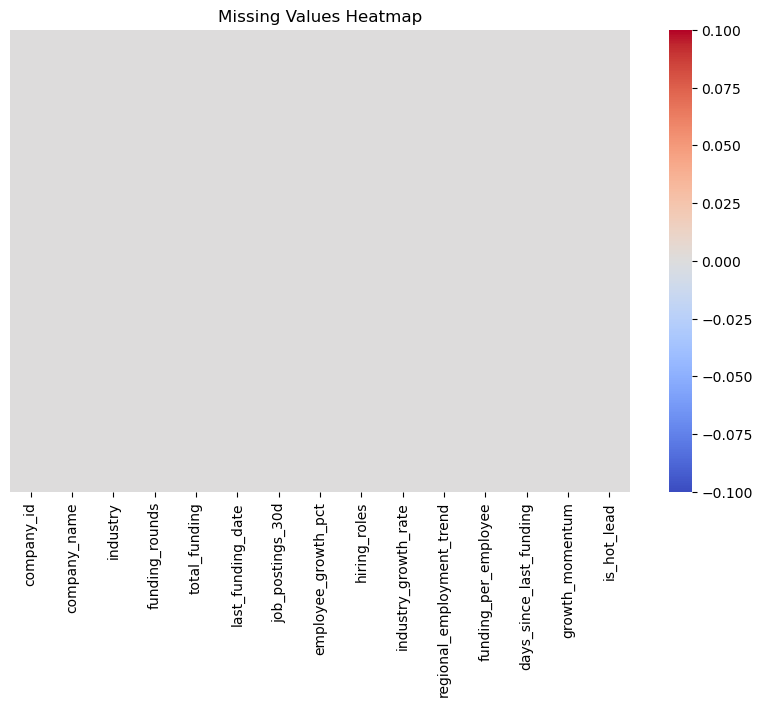

In [11]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap='coolwarm', cbar=True, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Feature Distributions & Outliers

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

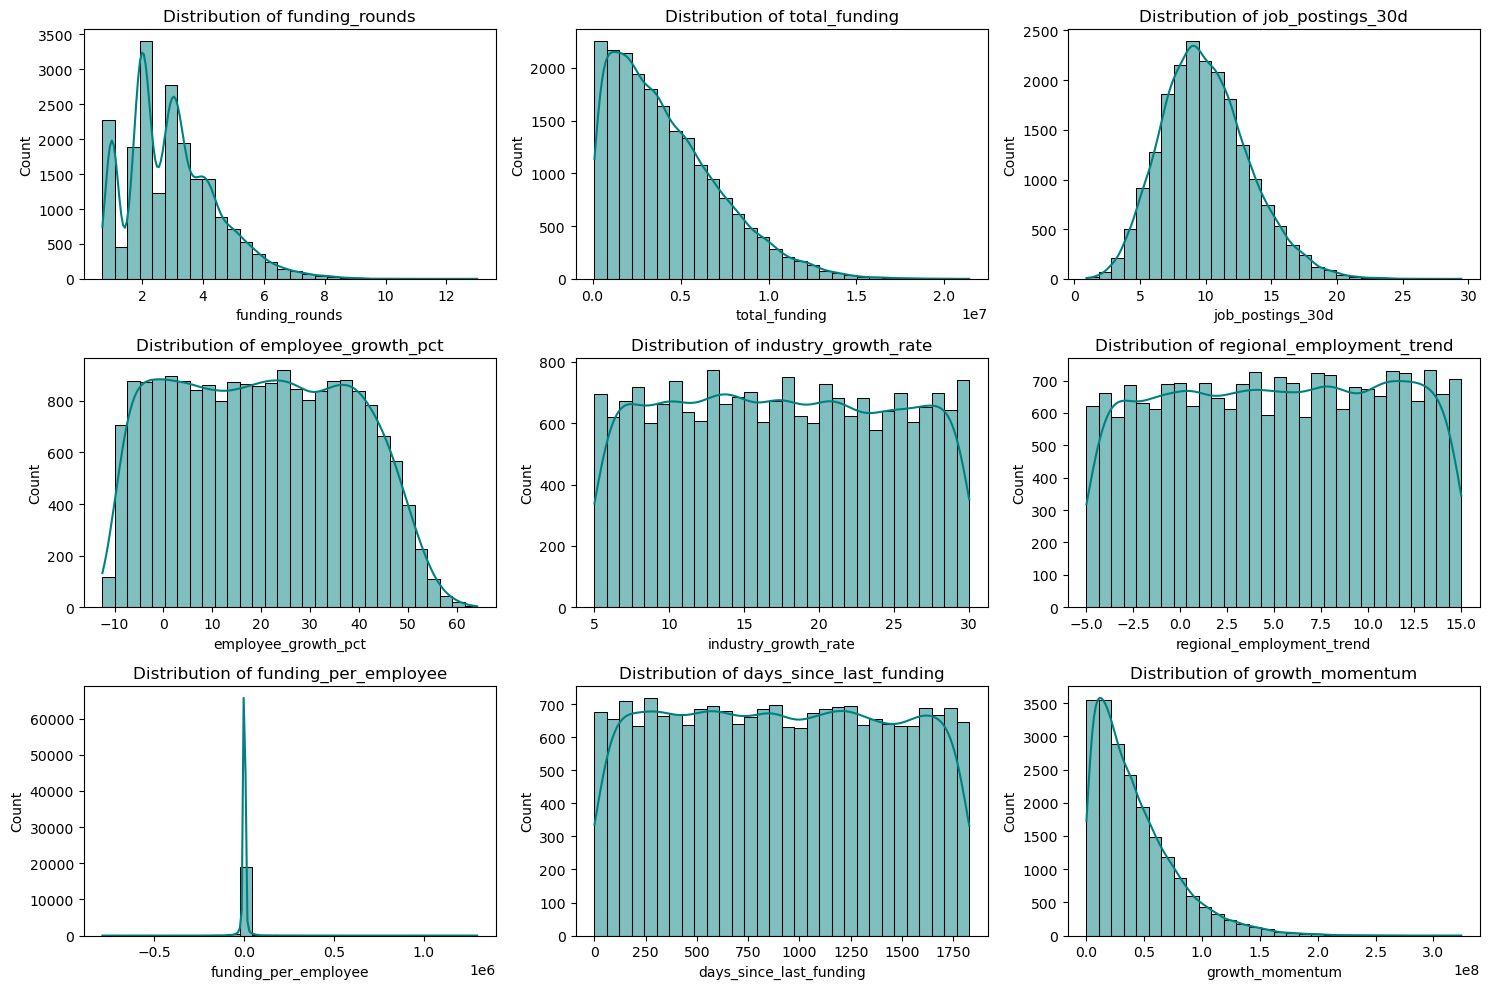

In [12]:
num_cols = [
    "funding_rounds", "total_funding", "job_postings_30d", 
    "employee_growth_pct", "industry_growth_rate", 
    "regional_employment_trend", "funding_per_employee", 
    "days_since_last_funding", "growth_momentum"
]

# Distribution of numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_df[col], bins=30, kde=True, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Detecting Outliers

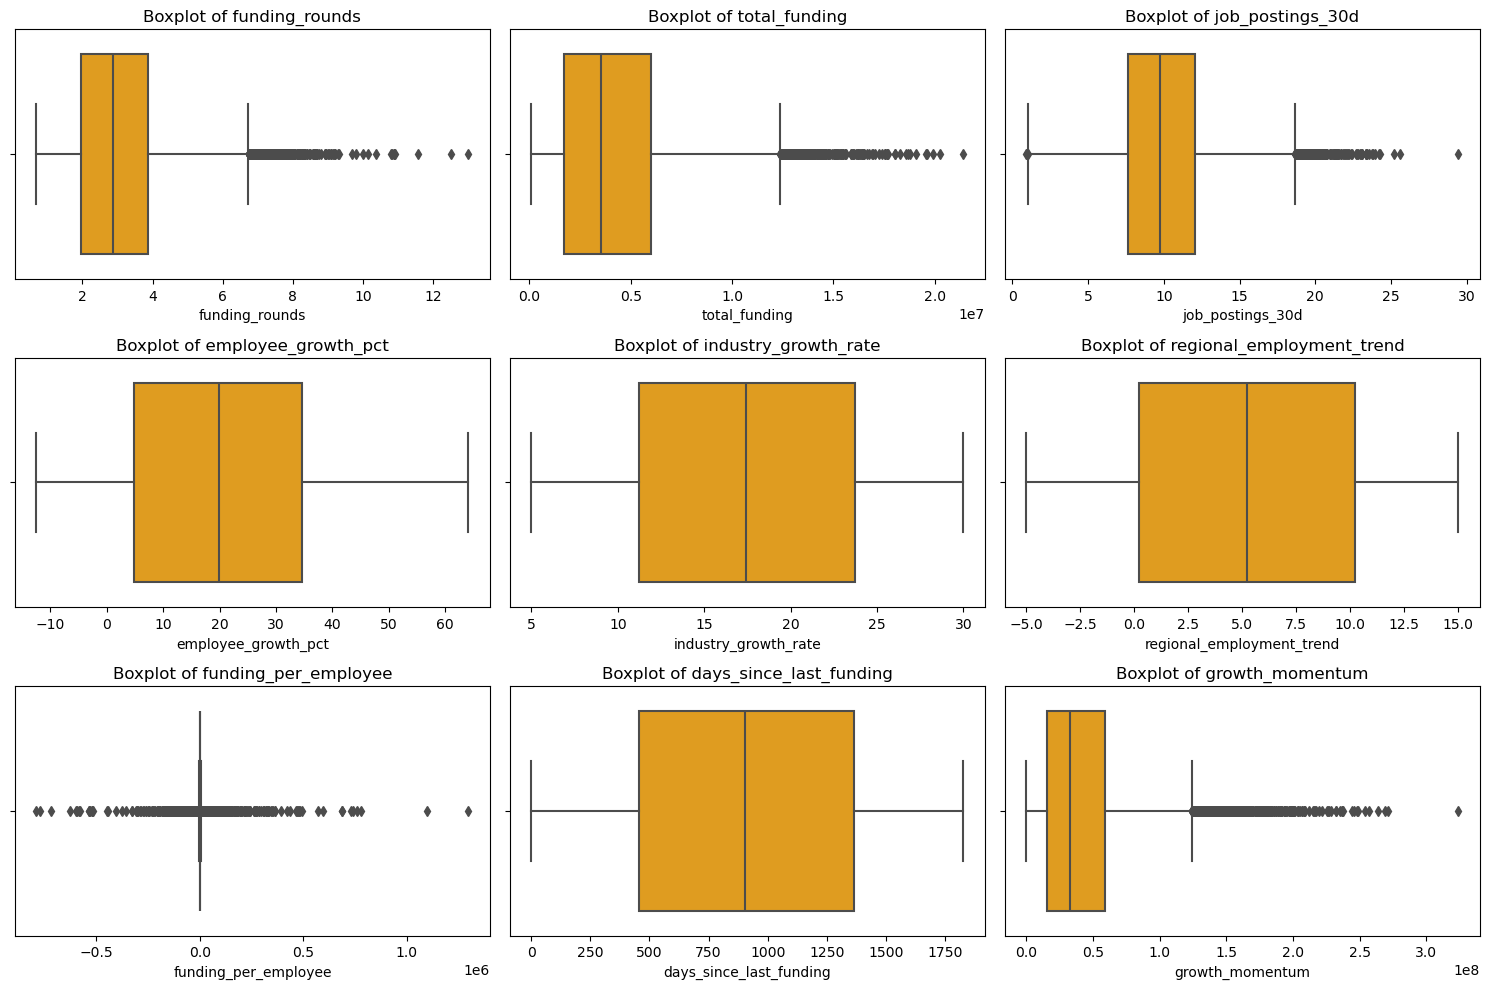

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=train_df[col], color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Target Variable Analysis

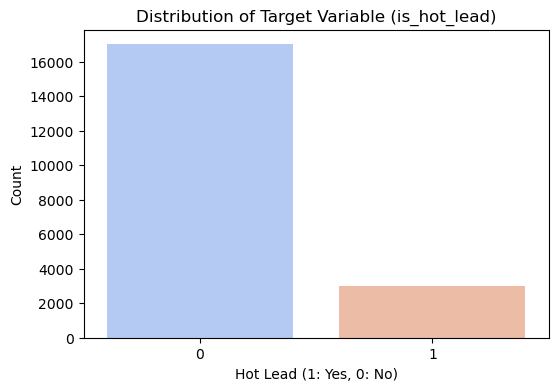


Target Variable Ratio:
 is_hot_lead
0    0.85075
1    0.14925
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_df["is_hot_lead"], palette="coolwarm")
plt.title("Distribution of Target Variable (is_hot_lead)")
plt.xlabel("Hot Lead (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

# Check imbalance
lead_ratio = train_df["is_hot_lead"].value_counts(normalize=True)
print("\nTarget Variable Ratio:\n", lead_ratio)


# Feature Correlation Analysis


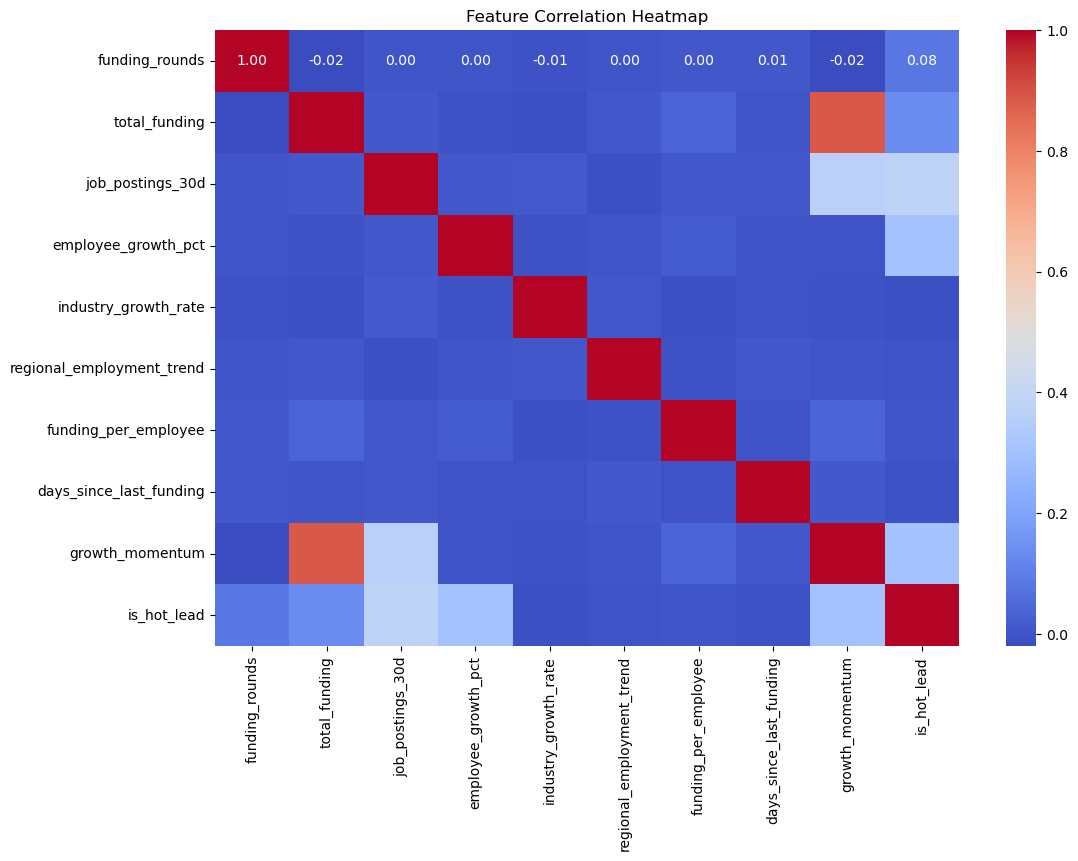

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df[num_cols + ["is_hot_lead"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Bivariate Analysis (Feature vs. Target)


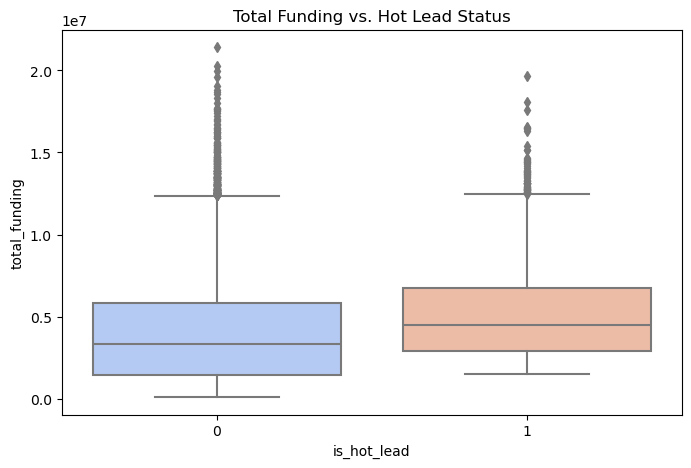

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_hot_lead", y="total_funding", data=train_df, palette="coolwarm")
plt.title("Total Funding vs. Hot Lead Status")
plt.show()

# KDE Plot of Growth Momentum

C:\Users\vijay\AppData\Local\Temp\ipykernel_1396\1050974219.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df["is_hot_lead"] == 1]["growth_momentum"], label="Hot Lead (1)", shade=True, color='red')
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\AppData\Local\Temp\ipykernel_1396\1050974219.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df["is_hot_lead"] == 0]["growth_momentum"], label="Not Hot Lead (0)", shade=True, color='blue')
C:\Users\vijay\anaconda3\Lib\site-packages\se

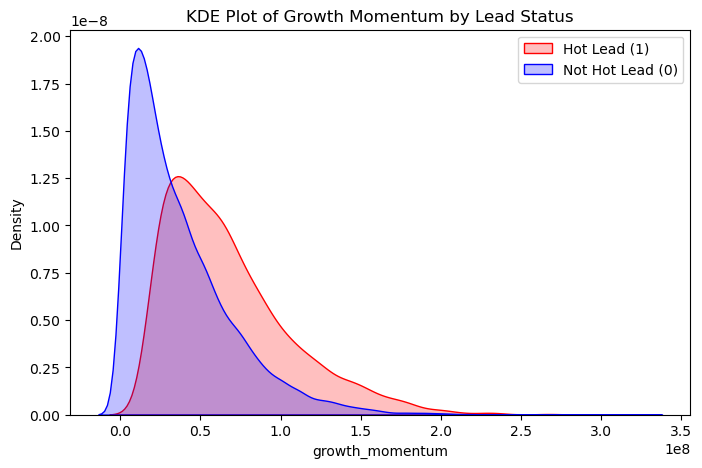

In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(train_df[train_df["is_hot_lead"] == 1]["growth_momentum"], label="Hot Lead (1)", shade=True, color='red')
sns.kdeplot(train_df[train_df["is_hot_lead"] == 0]["growth_momentum"], label="Not Hot Lead (0)", shade=True, color='blue')
plt.title("KDE Plot of Growth Momentum by Lead Status")
plt.legend()
plt.show()

# Industry & Hiring Trends


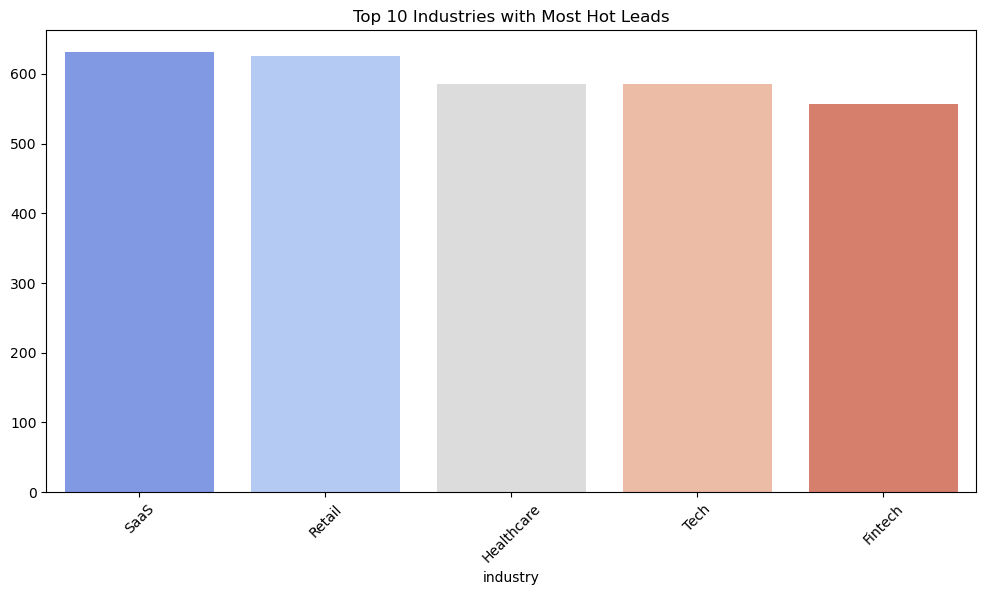

In [18]:
industry_counts = train_df.groupby("industry")["is_hot_lead"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Industries with Most Hot Leads")
plt.show()

## Hiring Trends vs. Hot Leads

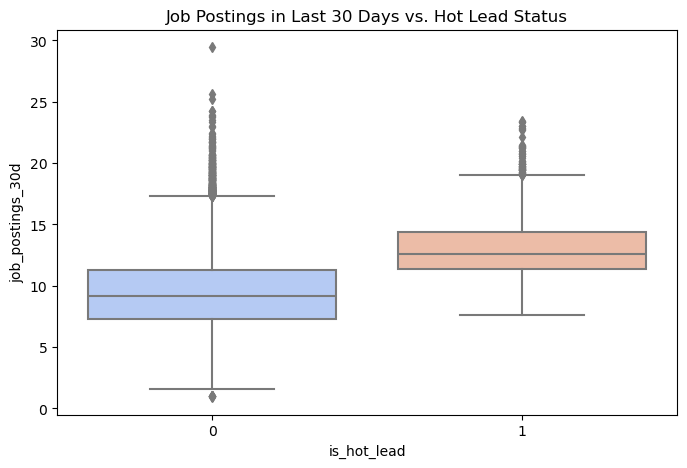

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_hot_lead", y="job_postings_30d", data=train_df, palette="coolwarm")
plt.title("Job Postings in Last 30 Days vs. Hot Lead Status")
plt.show()

# Feature Engineering:

## Funding & Hiring Trends Over Time

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


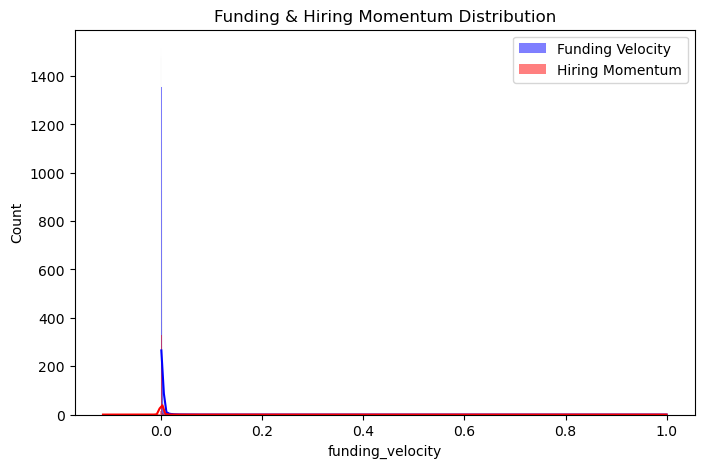

In [20]:
# Creating funding velocity (funding change per day)
train_df["funding_velocity"] = train_df["total_funding"] / (train_df["days_since_last_funding"] + 1)

# Hiring momentum (jobs posted per employee growth)
train_df["hiring_momentum"] = train_df["job_postings_30d"] / (train_df["employee_growth_pct"] + 0.01)

# Normalizing features
train_df["funding_velocity"] = train_df["funding_velocity"] /train_df["funding_velocity"].max()
train_df["hiring_momentum"] = train_df["hiring_momentum"] / train_df["hiring_momentum"].max()

# Visualizing
plt.figure(figsize=(8,5))
sns.histplot(train_df["funding_velocity"], kde=True, color="blue", label="Funding Velocity")
sns.histplot(train_df["hiring_momentum"], kde=True, color="red", label="Hiring Momentum")
plt.legend()
plt.title("Funding & Hiring Momentum Distribution")
plt.show()


# Unsupervised Clustering: Identifying Hidden Segments

C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


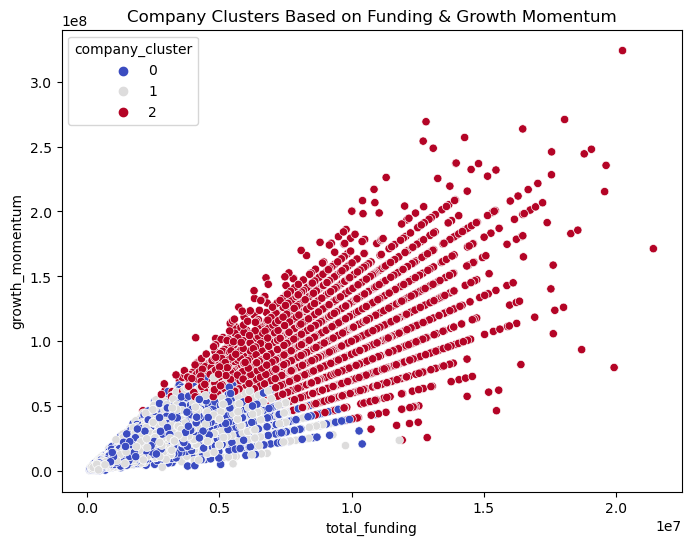

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant numeric features
features = ["total_funding", "job_postings_30d", "employee_growth_pct", "industry_growth_rate", "growth_momentum"]
X = train_df[features].fillna(0)  # Handling NaN

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Clustering into 3 segments
train_df["company_cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df["total_funding"], y=train_df["growth_momentum"], hue=train_df["company_cluster"], palette="coolwarm")
plt.title("Company Clusters Based on Funding & Growth Momentum")
plt.show()

# Industry Similarity Using NLP (Word Embeddings)


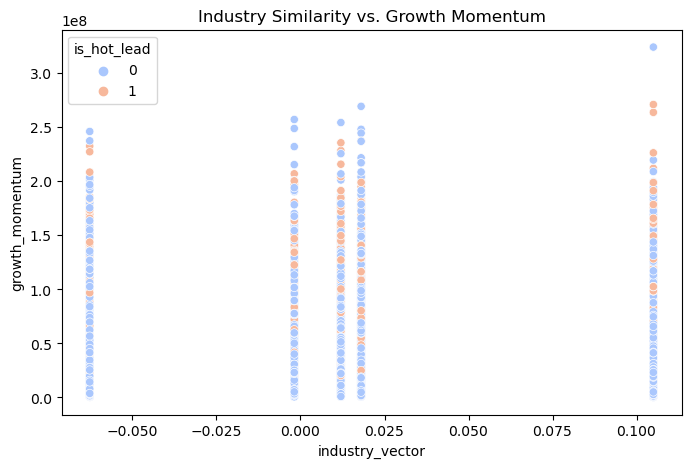

In [22]:
import gensim
from gensim.models import Word2Vec

# Creating a simple industry embedding
industry_list = train_df["industry"].dropna().unique()
industry_model = Word2Vec(sentences=[[word] for word in industry_list], vector_size=5, min_count=1)

# Convert industries into vector embeddings
train_df["industry_vector"] = train_df["industry"].apply(lambda x: np.mean(industry_model.wv[x]) if x in industry_model.wv else 0)

# Visualizing industry similarity
plt.figure(figsize=(8,5))
sns.scatterplot(x=train_df["industry_vector"], y=train_df["growth_momentum"], hue=train_df["is_hot_lead"], palette="coolwarm")
plt.title("Industry Similarity vs. Growth Momentum")
plt.show()

# Graph-Based Company Network Analysis


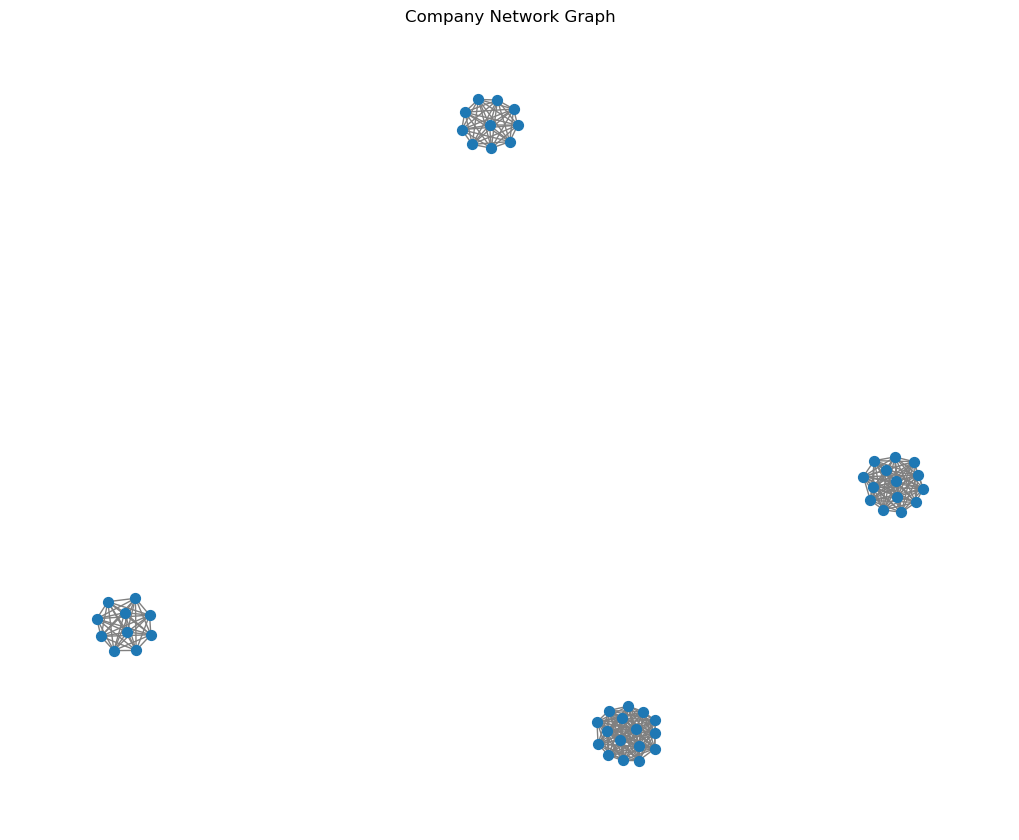

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating graph
G = nx.Graph()

# Adding nodes (companies) efficiently
company_ids = train_df["company_id"].values
industries = train_df["industry"].values
funding = train_df["total_funding"].values

for company_id, industry, total_funding in zip(company_ids, industries, funding):
    G.add_node(company_id, industry=industry, funding=total_funding)

# Adding edges based on similar hiring trends
hiring_roles = train_df["hiring_roles"].values
for i in range(len(company_ids)):
    for j in range(i + 1, len(company_ids)):
        if hiring_roles[i] == hiring_roles[j]:
            G.add_edge(company_ids[i], company_ids[j])

# Visualizing network (subset of 50 companies)
plt.figure(figsize=(10, 8))
sub_graph = G.subgraph(list(G.nodes)[:50])
pos = nx.spring_layout(sub_graph, k=0.1)
nx.draw(sub_graph, pos, node_size=50, edge_color="gray")
plt.title("Company Network Graph")
plt.show()


# Time-Series Anomaly Detection (Funding)


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


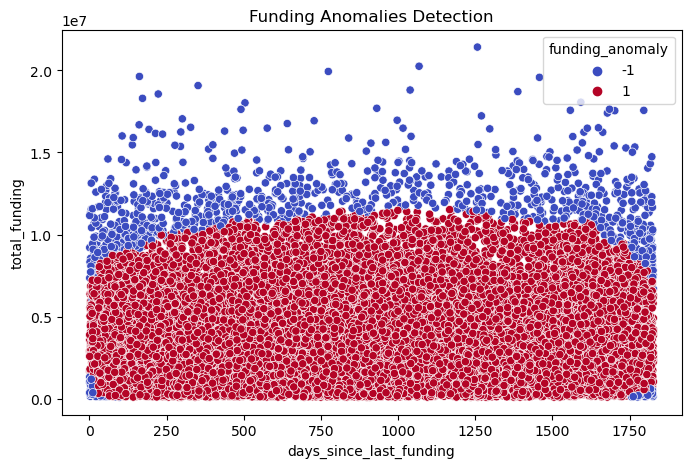

In [24]:
from sklearn.ensemble import IsolationForest

# Selecting time-based funding features
funding_data = train_df[["total_funding", "days_since_last_funding"]].fillna(0)

# Applying Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
train_df["funding_anomaly"] = model.fit_predict(funding_data)

# Visualizing anomalies
plt.figure(figsize=(8,5))
sns.scatterplot(x=train_df["days_since_last_funding"], y=train_df["total_funding"], hue=train_df["funding_anomaly"], palette="coolwarm")
plt.title("Funding Anomalies Detection")
plt.show()

# Encoding categorical features


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [26]:
label_enc = LabelEncoder()
train_df['industry'] = label_enc.fit_transform(train_df['industry'])
train_df['hiring_roles'] = label_enc.fit_transform(train_df['hiring_roles'])

In [27]:
# Normalizing numerical features
scaler = StandardScaler()
num_features = ["total_funding", "job_postings_30d", "employee_growth_pct", 
                "industry_growth_rate", "growth_momentum", "funding_velocity", "hiring_momentum"]
train_df[num_features] = scaler.fit_transform(train_df[num_features])

In [28]:
y = train_df["is_hot_lead"]
X = train_df.drop(columns=["company_id", "company_name", "is_hot_lead", "last_funding_date"])

In [29]:
# Converting target to categorical
y = to_categorical(y)

In [30]:
# Reshaping for LSTM (sequence input)
X_lstm = np.expand_dims(X.values, axis=1)  # Adding time dimension

# Building the LSTM Model


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X.shape[1])),
    BatchNormalization(),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification (hot lead or not)
])

# Compile model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_lstm, y, epochs=20, batch_size=32, validation_split=0.2)

C:\Users\vijay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8129 - loss: 0.5944 - val_accuracy: 0.8525 - val_loss: 0.4830
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8507 - loss: 0.4666 - val_accuracy: 0.8525 - val_loss: 0.4314
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8504 - loss: 0.4301 - val_accuracy: 0.8525 - val_loss: 0.4205
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8517 - loss: 0.4211 - val_accuracy: 0.8525 - val_loss: 0.4187
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8540 - loss: 0.4161 - val_accuracy: 0.8525 - val_loss: 0.4184
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8554 - loss: 0.4135 - val_accuracy: 0.8525 - val_loss: 0.4185
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8449 - loss: 0.4315 - val_accuracy: 0.8525 - val_loss: 0.4184
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8526 - loss: 0.4182 - val_accuracy: 0.

# CNN for Feature Learning

In [32]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

# Reshaping input for CNN
X_cnn = np.expand_dims(X.values, axis=2)

# Define CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification
])

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
cnn_model.fit(X_cnn, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


C:\Users\vijay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8099 - loss: 3.1523 - val_accuracy: 0.8525 - val_loss: 0.4881
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8523 - loss: 0.4687 - val_accuracy: 0.8525 - val_loss: 0.4331
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8490 - loss: 0.4332 - val_accuracy: 0.8525 - val_loss: 0.4209
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8500 - loss: 0.4241 - val_accuracy: 0.8525 - val_loss: 0.4187
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8477 - loss: 0.4268 - val_accuracy: 0.8525 - val_loss: 0.4184
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8520 - loss: 0.4193 - val_accuracy: 0.8525 - val_loss: 0.4184
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8516 - loss: 0.4200 - val_accuracy: 0.8525 - val_loss: 0.4184
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8516 - loss: 0.4200 - val_accuracy: 0.8525 - val_

# Model Evaluation


In [33]:
from sklearn.metrics import accuracy_score, f1_score

# Predictions
lstm_preds = np.argmax(lstm_model.predict(X_lstm), axis=1)
cnn_preds = np.argmax(cnn_model.predict(X_cnn), axis=1)

# True labels
y_true = np.argmax(y, axis=1)

# Model performance
lstm_acc = accuracy_score(y_true, lstm_preds)
lstm_f1 = f1_score(y_true, lstm_preds)

cnn_acc = accuracy_score(y_true, cnn_preds)
cnn_f1 = f1_score(y_true, cnn_preds)

print(f"LSTM Accuracy: {lstm_acc}, F1 Score: {lstm_f1}")
print(f"CNN Accuracy: {cnn_acc}, F1 Score: {cnn_f1}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Accuracy: 0.85075, F1 Score: 0.0
CNN Accuracy: 0.85075, F1 Score: 0.0


# Check Class Distribution


{0: 17015, 1: 2985}


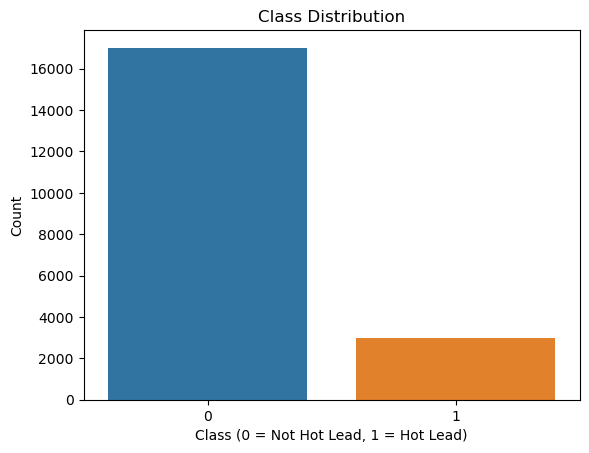

In [34]:

# Check class distribution
unique, counts = np.unique(y_true, return_counts=True)
print(dict(zip(unique, counts)))

# Plot distribution
sns.barplot(x=unique, y=counts)
plt.xlabel("Class (0 = Not Hot Lead, 1 = Hot Lead)")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

# Handle Class Imbalance


In [35]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_true), y=y_true)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Retrain LSTM with class weights
lstm_model.fit(X_lstm, y, epochs=20, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8512 - loss: 0.8658 - val_accuracy: 0.8525 - val_loss: 0.6009
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.6899 - val_accuracy: 0.8525 - val_loss: 0.6805
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8509 - loss: 0.6897 - val_accuracy: 0.1475 - val_loss: 0.6958
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2276 - loss: 0.7004 - val_accuracy: 0.8525 - val_loss: 0.6926
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3727 - loss: 0.6997 - val_accuracy: 0.8525 - val_loss: 0.6904
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4328 - loss: 0.6986 - val_accuracy: 0.8525 - val_loss: 0.6895
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8267 - loss: 0.6888 - val_accuracy: 0.1475 - val_loss: 0.6972
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1877 - loss: 0.6967 - val_accuracy: 0.

In [36]:
lstm_preds_prob = lstm_model.predict(X_lstm)
lstm_preds_adjusted = (lstm_preds_prob[:, 1] > 0.3).astype(int)  # Lowering threshold from 0.5 to 0.3

# Compute new F1-score
from sklearn.metrics import f1_score
new_f1 = f1_score(y_true, lstm_preds_adjusted)
print(f"New F1 Score: {new_f1}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
New F1 Score: 0.259734609527953


In [38]:
lstm_model.save('lstm_model.keras')


In [39]:
from tensorflow.keras.models import load_model

# Load the model
lstm_model = load_model('lstm_model.keras')

# Assuming X_lstm is your test data
lstm_probs = lstm_model.predict(X_lstm)
lstm_preds_adjusted = (lstm_probs[:, 1] > 0.3).astype(int)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Id': np.arange(len(lstm_preds_adjusted)),
    'Prediction': lstm_preds_adjusted
})

# Save submission file
submission_df.to_csv('submission.csv', index=False)


C:\Users\vijay\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
